<div style="text-align: center;">
    <img src="https://mejores.com/wp-content/uploads/2020/08/Universidad-Tecnica-Federico-Santa-Maria.jpg" title="Title text" width="20%" height="20%" />
</div>



<hr style="height:2px;border:none"/>
<h1 align='center'> Diplomado IA Orientado a la Salud </h1>

<H3 align='center'> Proyecto Final: Burnout en Personal de Salud </H3>
<hr style="height:2px;border:none"/>

## Objetivo del proyecto
Desarrollar un modelo de Machine Learning capaz de clasificar el Nivel de Burnout del personal de salud, basándose en variables dadas por la información a analizar. Los datos utilizados provienen del conjunto Healthcare Workforce Mental Health Dataset de Kaggle. La tarea principal es de Clasificación Multiclase (ya que hay más de dos niveles de burnout).

## Introducción

* ### Contexto

El síndrome de Burnout (agotamiento profesional) representa un problema de salud ocupacional con graves repercusiones en el sector de la salud. Específicamente en el área de enfermería, la alta carga asistencial y la exposición a factores estresantes incrementan el riesgo. Con este proyeco se desea crear modelos predictivos que busquen identificar tempranamente a los trabajadores con mayor riesgo de burnout, facilitando la implementación de estrategias de intervencion y prevención.

* ### Objetivo del modelo

El objetivo específico es realizar una Clasificación de caracteristicas y posterior prediccion. El modelo debe aprender la relación entre las características y la variable objetivo con tres categorías (Nivel de Burnout). El éxito del modelo se evaluará mediante métricas de rendimiento específicas para clasificación. Además, el proyecto incluye una fase de selección de características, usando análisis estadístico para determinar cuáles variables tienen una relación más significativa con el burnout.

* ### Alcance del informe

Este informe documenta el flujo de trabajo del proyecto: la adquisición y Análisis Exploratorio de Datos, el preprocesamiento de datos, la implementación y entrenamiento de un modelo de clasificación con Python/Scikit-learn, la partición de datos (entrenamiento y test), la evaluación del rendimiento del modelo y la interpretación de los resultados obtenidos.

## Descripción del Conjunto de Datos:
  * ### Fuentes de datos: Indicar la fuente de los datos.
      * Acceder y manipular datos dentro de `DataFrame`
      * Importar datos CSV a un `DataFrame` de *Pandas*
      * Visualización inicial de características

<hr style="height:2px;border:none"/>

In [1]:
#RESPUESTA
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
#Carga de Datos
df = pd.read_csv('../data/Healthcare Workforce Mental Health Dataset.csv', sep=';')
#Examinacion de dimensiones de la informacion
display(df.shape)
#Primera visualizacion de datos
df.head()

(5000, 10)

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


* ### Preprocesamiento: Describir los pasos de preprocesamiento, como limpieza,  normalización y selección de características.
    * #### Procedemos a revisar su hay nulos entre las columnas y variables.
    Segun se ve o existe ese caso.

In [2]:
#Descripcion de tipos de datos por columna de la data
df.info()
#Datos nulos por columna
df_nulos=df.isnull()
display(df_nulos.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


Employee ID               0
Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64

* #### Detalle Columnas

    * A continuacion se describen las columnas, tipo y accion a realizar sobre ellas. Esto ultimo podria cambiar.

| Columna | Característica Estimada | Impacto en el Proyecto (Reporte) |
| :--- | :--- | :--- |
| **Employee ID** | Identificador  | Debe eliminarse. |
| **Employee Type** | Categórica | Necesita One-Hot Encoding (pero en duda, pudiendo ser para agrupar). |
| **Department** | Categórica | Necesita One-Hot Encoding (pero en duda, pudiendo ser para agrupar). |
| **Workplace Factor** | Categórica* | Se debe evaluar si se asocia al burnout. |
| **Stress Level** | Numérica | Puede necesitar Normalización. |
| **Burnout Frequency** | Categóric| **VARIABLE OBJETIVO:** Confirma la Clasificación Multiclase. Necesita Label Encoding (0, 1, 2). |
| **Job Satisfaction** | Numérica | Puede necesitar Escalado. |
| **Access to EAPs** | Categórica (Acceso a Programa de Asistencia al Empleado) | Necesita Codificación (Label o One-Hot). |
| **Mental Health Absences** | Numérica | Puede ser normalizada |
| **Turnover Intention** | Categórica (Intencion de Abandono o Rotacion) | Necesita Codificación (Label o One-Hot). |


* #### Eliminación - Normalización - Encoding

    * En primer lugar eliminamos lo que no necesitaremos de la informacion provista, como el Id de empleado

In [3]:
#Eliminacion del Id de Empleado
df.drop('Employee ID', axis=1, inplace=True)
df.head()

,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


* #### Normalizacion y Encoding
    * Iniciamos seleccionando las variables categoricas, para su trasnformacion a 0 y 1
    * Posteriormente reemplazamos la variable turnover intention que posee 

In [4]:
#Seleccionamos variables categoricas con mas de dos categoria y que no son 
#variables objetivos
columnas_cat = ['Employee Type', 'Department', 'Workplace Factor', 'Access to EAPs']

df_procesado = pd.get_dummies(df, columns=columnas_cat, prefix=columnas_cat)

#siguientes lineas transforman en variables numericas lo anterior (true=1 y false=0)
columnas_dummy = [col for col in df_procesado.columns if any(col.startswith(p) for p in columnas_cat)]
df_procesado[columnas_dummy] = df_procesado[columnas_dummy].astype(int)

#Transformacion de variable objetivo "Burnout Frequency": 
# Never = 0
# Occasionally = 1
# Often = 2

mapeo_burnout = {
    'Never': 0,
    'Occasionally': 1,
    'Often': 2
}

df_procesado['Burnout Frequency_Encoded'] = df_procesado['Burnout Frequency'].map(mapeo_burnout)
df_procesado.drop('Burnout Frequency', axis=1, inplace=True)

#Procesamiento de 'Turnover Intention', convertir 'Yes' y 'No' a 1 y 0
le = LabelEncoder()
df_procesado['Turnover Intention_Encoded'] = le.fit_transform(df_procesado['Turnover Intention'])
df_procesado.drop('Turnover Intention', axis=1, inplace=True)

#se realiza un describe para ver como procesar variables numericas iniciales, min-max o estandarizacion
df_procesado.describe()




,Stress Level,Job Satisfaction,Mental Health Absences,Employee Type_Critical Care Nurse,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),...,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Access to EAPs_No,Access to EAPs_Yes,Burnout Frequency_Encoded,Turnover Intention_Encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000
mean,7.327800,2.202200,7.396200,0.097600,0.101400,0.070800,0.102600,0.100400,0.052400,0.074400,...,0.42760,0.017000,0.224400,0.08300,0.029200,0.068000,0.28120,0.71880,1.27660,0.667000
std,1.407673,1.045722,2.878625,0.296803,0.301888,0.256516,0.303466,0.300563,0.222855,0.262447,...,0.49478,0.129284,0.417228,0.27591,0.168384,0.251771,0.44963,0.44963,0.73171,0.471334
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000
25%,7.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,1.00000,0.000000
50%,8.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.00000,1.00000,1.000000
75%,8.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,1.00000,2.00000,1.000000
max,9.000000,5.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,2.00000,1.000000


In [5]:
#Procesamiento de variables numericas, a pesar de que no 
#hay mucha diferencia entre min max de las variabales numericas, me decanto por la estandarizacion 
#para su transformacion
columnas_numericas = ['Stress Level', 'Job Satisfaction', 'Mental Health Absences']
scaler = StandardScaler()
data_a_estandarizar = df_procesado[columnas_numericas].values
data_estandarizada = scaler.fit_transform(data_a_estandarizar)
df_procesado[columnas_numericas] = data_estandarizada
df_procesado.head()

,Stress Level,Job Satisfaction,Mental Health Absences,Employee Type_Critical Care Nurse,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),...,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Access to EAPs_No,Access to EAPs_Yes,Burnout Frequency_Encoded,Turnover Intention_Encoded
0,0.477573,-0.193379,-0.485072,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,2,0
1,0.477573,-1.149752,1.599465,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,2,0
2,-0.943353,-0.193379,0.557197,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
3,-0.232890,1.719367,1.252042,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.477573,-0.193379,-0.137649,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


* #### Distribución de los datos: Incluir análisis exploratorio, como distribuciones de clase (para clasificación) o valores típicos y extremos (para regresión).
    * ESTADISTICAS BASICAS

In [6]:
df_procesado.describe()

,Stress Level,Job Satisfaction,Mental Health Absences,Employee Type_Critical Care Nurse,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,Employee Type_Physician (General),...,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Access to EAPs_No,Access to EAPs_Yes,Burnout Frequency_Encoded,Turnover Intention_Encoded
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000
mean,9.663381e-17,1.222134e-16,-1.435296e-16,0.097600,0.101400,0.070800,0.102600,0.100400,0.052400,0.074400,...,0.42760,0.017000,0.224400,0.08300,0.029200,0.068000,0.28120,0.71880,1.27660,0.667000
std,1.000100e+00,1.000100e+00,1.000100e+00,0.296803,0.301888,0.256516,0.303466,0.300563,0.222855,0.262447,...,0.49478,0.129284,0.417228,0.27591,0.168384,0.251771,0.44963,0.44963,0.73171,0.471334
min,-2.364280e+00,-1.149752e+00,-2.569609e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000
25%,-2.328899e-01,-1.149752e+00,-8.324945e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,1.00000,0.000000
50%,4.775734e-01,-1.933786e-01,-1.376489e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.00000,1.00000,1.000000
75%,4.775734e-01,7.629944e-01,5.571967e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,1.00000,2.00000,1.000000
max,1.188037e+00,2.675740e+00,4.031425e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,2.00000,1.000000


In [7]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Stress Level                               5000 non-null   float64
 1   Job Satisfaction                           5000 non-null   float64
 2   Mental Health Absences                     5000 non-null   float64
 3   Employee Type_Critical Care Nurse          5000 non-null   int64  
 4   Employee Type_Healthcare Administrator     5000 non-null   int64  
 5   Employee Type_Laboratory Technician        5000 non-null   int64  
 6   Employee Type_Medical Assistant            5000 non-null   int64  
 7   Employee Type_Nursing Assistant            5000 non-null   int64  
 8   Employee Type_Pediatric Nurse              5000 non-null   int64  
 9   Employee Type_Physician (General)          5000 non-null   int64  
 10  Employee Type_Physician 

* CORRELACIONES

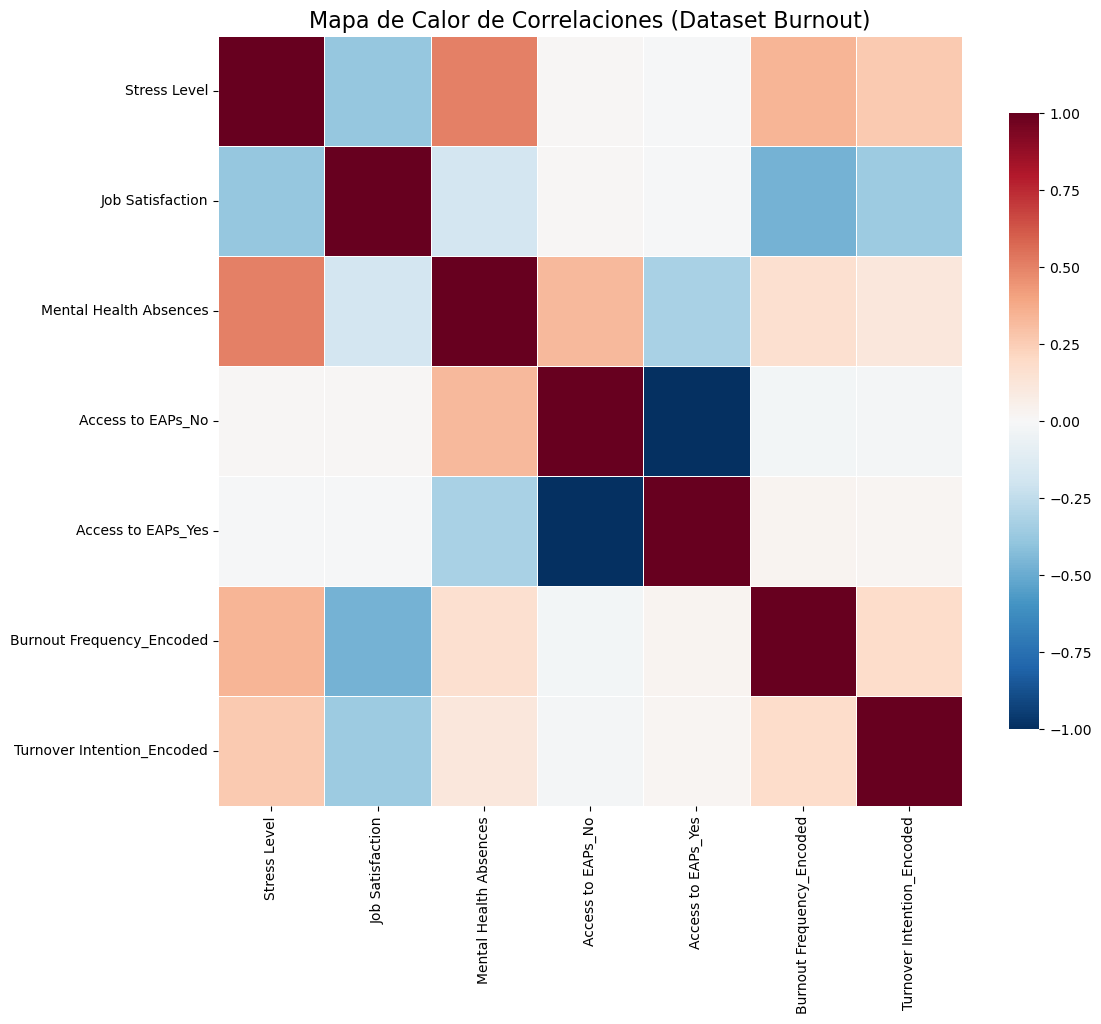

In [8]:
# Grafico para identificar correlaciones para variables que eran numericas al inicio y las categoricas que eran binarias
columnas_no_categoricas=['Stress Level','Job Satisfaction','Mental Health Absences','Access to EAPs_No','Access to EAPs_Yes','Burnout Frequency_Encoded','Turnover Intention_Encoded']
corr = df_procesado[columnas_no_categoricas].corr()

# Creamos el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            cmap='RdBu_r', # Rojo para positivo, Azul para negativo
            center=0,      # El blanco representa correlación cero
            annot=False,   # No ponemos números para evitar saturación
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Mapa de Calor de Correlaciones (Dataset Burnout)', fontsize=16)
plt.show()

Interpretacion de Grafico de Correlacion

Stress Level vs. Mental Health Absences: Tienen un número positivo (aprox 0.31). Esto sugiere que el personal con más estrés tiende a faltar más por salud mental.

Job Satisfaction vs. Stress Level: Tienen un número negativo (-0.34). Es lógico: a más estrés, menos satisfacción.

Job Satisfaction vs. Mental Health Absences: También es negativa (-0.45). Esta es una de las relaciones más "fuertes" en tu gráfico; la falta de satisfacción parece estar muy ligada a pedir licencias médicas.

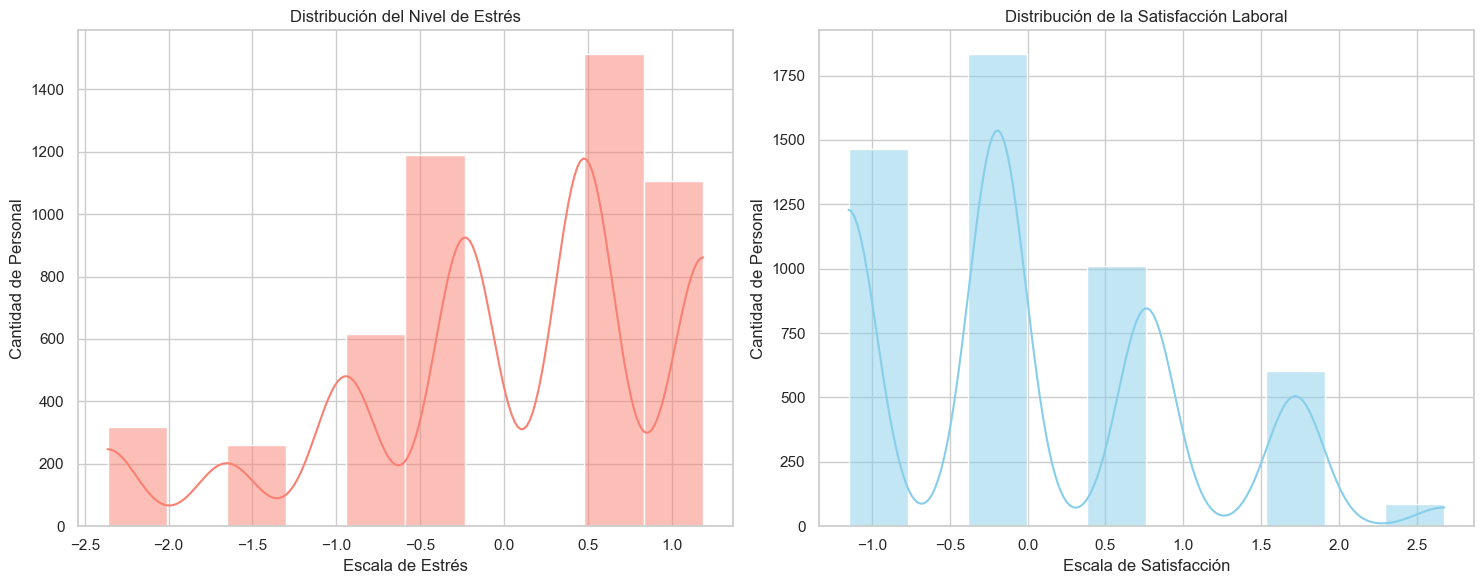

In [9]:
# Configuramos el estilo
sns.set_theme(style="whitegrid")

# Creamos una figura con varios subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma 1: Nivel de Estrés
sns.histplot(df_procesado['Stress Level'], bins=10, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Distribución del Nivel de Estrés')
axes[0].set_xlabel('Escala de Estrés')
axes[0].set_ylabel('Cantidad de Personal')

# Histograma 2: Satisfacción Laboral
sns.histplot(df_procesado['Job Satisfaction'], bins=10, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribución de la Satisfacción Laboral')
axes[1].set_xlabel('Escala de Satisfacción')
axes[1].set_ylabel('Cantidad de Personal')

plt.tight_layout()
plt.show()